In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp as ODESolver

In [70]:
def SIR(t , Components):
    S=Components[0]
    Iw=Components[1]
    Ir=Components[2]
    beta0=Components[3]
    ds=neu-beta0*S*Iw-beta[1]*S*Ir-mio*S
    dIw=beta0*S*Iw-(gamma[0])*Iw-mio*Iw
    dIr=beta[1]*S*Ir-gamma[1]*Ir-mio*Ir
    temp=[ds , dIw , dIr , 0]
    return temp

In [131]:
I=[1e-6 ,1e-6]
S=1
beta=[1,0.4]
gamma=[0.3, 0.1]
temp1=[]
temp2=[]
time=[]
neu=5e-5
mio=5e-5
for i in np.arange(0 ,3, 0.03):
    print(i)
    ODEAnswer = ODESolver(SIR, (0,300*365), [S , I[0] , I[1],i] )
    if ODEAnswer.y.T[-1][1]>0 and ODEAnswer.y.T[-1][2]>0 : 
        temp2.append(ODEAnswer.y.T[-1][2])
        temp1.append(ODEAnswer.y.T[-1][1])
        time.append((i/(gamma[0]+mio))/(beta[1]/(gamma[1]+mio)))

0.0
0.03
0.06
0.09
0.12
0.15
0.18
0.21
0.24
0.27
0.3
0.32999999999999996
0.36
0.39
0.42
0.44999999999999996
0.48
0.51
0.54
0.57
0.6
0.63
0.6599999999999999
0.69
0.72
0.75
0.78
0.8099999999999999
0.84
0.87
0.8999999999999999
0.9299999999999999
0.96
0.99
1.02
1.05
1.08
1.1099999999999999
1.14
1.17
1.2
1.23
1.26
1.29
1.3199999999999998
1.3499999999999999
1.38
1.41
1.44
1.47
1.5
1.53
1.56
1.5899999999999999
1.6199999999999999
1.65
1.68
1.71
1.74
1.77
1.7999999999999998
1.8299999999999998
1.8599999999999999
1.89
1.92
1.95
1.98
2.01
2.04
2.07
2.1
2.13
2.16
2.19
2.2199999999999998
2.25
2.28
2.31
2.34
2.37
2.4
2.4299999999999997
2.46
2.4899999999999998
2.52
2.55
2.58
2.61
2.6399999999999997
2.67
2.6999999999999997
2.73
2.76
2.79
2.82
2.85
2.88
2.9099999999999997
2.94
2.9699999999999998


In [139]:
#plt.yscale('log')
#plt.ylim(1e-10 , 1)
plt.title('I\u221E vs R0 Ratios')
plt.ylabel('I\u221E')
plt.xlabel('R0 Ratio')
plt.xlim(0 , 2)
plt.plot(time , temp1 , label='I\u221E Wild' , color='b')
plt.plot(time ,  temp2, label='I\u221E Resistant' , color='r')
plt.legend()
plt.savefig(r'C:\Users\asus\Desktop\\'+'name'+'.png' , dpi=200)

In [117]:
x=[temp1 , time]
x

[[1.3459150601559188e-06,
  1.0290832341205863e-06,
  8.347967950119102e-07,
  7.450051356195429e-07,
  1.3323376084705378e-06,
  1.0989889577756101e-06,
  1.048641205105181e-06,
  1.1398784236156134e-06,
  1.3014173452390103e-06,
  7.334551804417077e-07,
  1.0115195674474677e-06,
  7.595528687026872e-07,
  8.013869814268702e-07,
  8.550936928959945e-07,
  8.544033540131896e-07,
  1.1799620276335687e-06,
  9.933275307297024e-07,
  1.0317759159552018e-06,
  1.168829959939705e-06,
  9.839210566720024e-07,
  8.392860006395059e-07,
  1.039891738492524e-06,
  7.316282563463537e-07,
  1.0219005775410177e-06,
  1.1033983386672568e-06,
  1.1098550374460092e-06,
  6.50502696338055e-07,
  9.503659691653159e-07,
  9.692892855811563e-07,
  9.250086254870901e-07,
  1.5698485296076123e-06,
  1.4344162495915822e-06,
  6.610646229186907e-07,
  1.1382108055438598e-06,
  6.617724100285414e-07,
  8.196299364883661e-07,
  8.022154945153557e-07,
  1.0339944524421785e-06,
  7.354796566240113e-07,
  7.087963

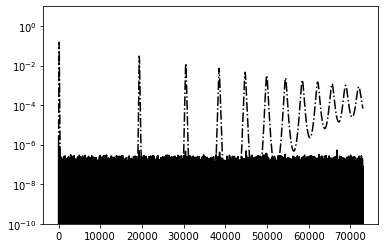

In [62]:
plt.ylim(1e-10 , 10e0)
plt.yscale('log')
plt.plot(ODEAnswer.t, ODEAnswer.y.T[:,1] ,label='infected by  wild', color='black'  )
plt.plot(ODEAnswer.t, ODEAnswer.y.T[:,2], '-.'  ,label='infected by resistent', color='black' )

In [131]:
def findIstar():
    I=[1e-6 ,1e-6]
    S=1
    beta=[1, 0.5]
    gamma=0.1
    neu=5.5e-5
    mio=5.5e-5
    Istarw=[]
    Istarr=[]
    for i in  np.arange(0 , 0.15, 0.001): 
        ODEAnswer = ODESolver(SIR, (0,200*365), [S , I[0] , I[1] , i]  )
        Istarw.append(ODEAnswer.y.T[-3][1])
        Istarr.append(ODEAnswer.y.T[-3][2])
    return [Istarw , Istarr]

In [132]:
x=findIstar()

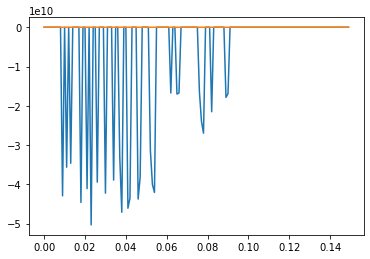

In [133]:
plt.plot(np.arange(0 , 0.15, 0.001) , x[0])
plt.plot(np.arange(0 , 0.15, 0.001) , x[1])


In [69]:
def dydx(x, y): 
    return ((x - y)/2) 
  
# Finds value of y for a given x using step size h 
# and initial value y0 at x0. 
def rungeKutta(x0, y0, x, h): 
    # Count number of iterations using step size or 
    # step height h 
    n = (int)((x - x0)/h)  
    # Iterate for number of iterations 
    y = y0 
    for i in range(1, n + 1): 
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y) 
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1) 
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2) 
        k4 = h * dydx(x0 + h, y + k3) 
  
        # Update next value of y 
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
  
        # Update next value of x 
        x0 = x0 + h 
    return y 
  
# Driver method 
x0 = 0
y = 1
x = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(x0, y, x, h) )
 

The value of y at x is: 1.1036393232374955
